<center><h1>Computational Statistics:</h1></center>
<center><h1>Permutation Testing</h1></center>

Preview
-------

- Use a for-loop and a random number generator to construct statistical tests

In [208]:
reset -fs

<center><h2>Is a drug effective or not?</h2></center>

In [209]:
drug    = [54, 73, 53, 70, 73, 68, 52, 65, 65]
placebo = [54, 51, 58, 44, 55, 52, 42, 47, 58, 46]

What are the steps to test that hypothesis?

1. Calculate the mean difference between the two groups
1. Collect evidence if that mean difference could happen by chance
1. Make a decision - is the difference between due to chance or not?

In [210]:
# Python's statitics module provides functions for calculating mathematical statistics of numeric (real-valued) data
from statistics import mean

In [211]:
from statistics import mean

In [212]:
observed_diff = mean(drug) - mean(placebo)
print(f"{observed_diff:.2f}")

12.97


That number is ugly and hard to read. 

In [213]:
# Use formated strings to create a human-readable view of data


In [214]:
print(f"{observed_diff:.2f}")

12.97


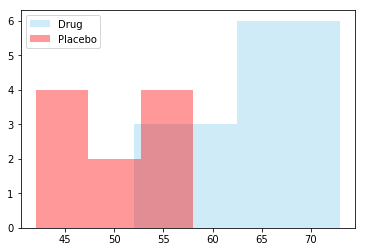

In [215]:
# Always visually inspect your data
import matplotlib.pylab as plt
import seaborn as sns # A library for statical plotting

%matplotlib inline

sns.distplot(drug, color="skyblue", label="Drug", kde=False);
sns.distplot(placebo, color="red", label="Placebo", kde=False);
plt.legend(); # Seaborn plots are interoperatable with matplotlib

What would look if there were no difference in the groups?
---------



That is the same if take the data and shuffled labels.

In [216]:
# Unite the data
combined = drug + placebo

In [217]:
from random import shuffle

shuffle(combined) # Rearrange in-place
combined

[53, 54, 65, 70, 58, 42, 44, 73, 55, 52, 47, 65, 58, 46, 52, 51, 68, 54, 73]

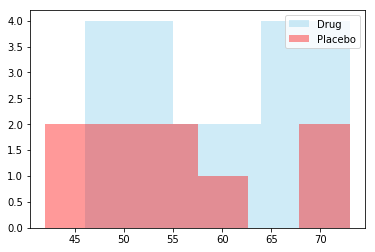

In [218]:
shuffle(combined) # Rearrange in-place

# Randomly assign to drug and placebo group
drug_random = combined[len(drug):]
placebo_random = combined[:len(drug)]

sns.distplot(drug_random, color="skyblue", label="Drug", kde=False);
sns.distplot(placebo_random, color="red", label="Placebo", kde=False);
plt.legend();

In [219]:
# Let's simulate it a bunch of times
n = 10_000
count = 0

for _ in range(n):
    shuffle(combined)
    shuffled_diff = mean(combined[:len(drug)]) - mean(combined[len(drug):])
    count += (shuffled_diff >= observed_diff)

In [220]:
print(f"""{n:,} label reshufflings produced only {count} instances 
with a difference at least as extreme as the observed difference of {observed_diff:.1f}.""")

10,000 label reshufflings produced only 11 instances 
with a difference at least as extreme as the observed difference of 13.0.


<center><h2>What is the chance of that happening?</h2></center>

We need the probability no difference, aka the p-values.

In [221]:
# The p-value is chance of observing the current difference when there is truly no difference
count / n

0.0011

<center><h2>Any Questions?</h2></center>
<br>
<center><h2>(There has to be! P-values are one of the most confusing in Statistics.)</h2></center>

<center><h2><center><h2>What conclusion should we draw?</h2></center></h2></center>

<center><img src="images/p_values.png" width="40%"/></center>

<center><h2><center><h2>What conclusion should we draw?</h2></center></h2></center>

There is a difference between the drug and the placebo groups.

Reject the null hypothesis. 

<center><h2>Analytical vs Computational Hypothesis Testing</h2></center>

<center><h2>Analytical Hypothesis Testing Steps</h2></center>

1. Setup testing framework
    1. Create null and alternative hypothesis
    1. Set α, the threshold for rejecting differences
1. Collect data
1. Pick and calculate a test statistic
1. Calculate p-value
1. Draw conclusion

<center><h2>Computational Hypothesis Testing Steps</h2></center>

1. Setup testing framework
    1. Create null and alternative hypothesis
    1. Set α
1. Collect data
1. __Iterate while shuffling data to simulate null effect__
1. Calculate p-value 
1. Draw conclusion

<center><h2>Analytical vs Computational Hypothesis</h2></center>

__All of the steps are the same except one.__

The only difference is:

- Analytical methods uses domain and theoretical knowledge to pick the sampling distribution and test statistic.
- Computational methods use fundamental computing (looping and random number generator) to simulate null effects and the sampling distribution.

<center><h2>Advantages of Computational Approach</h2></center>

1) Analysis often dictates the test statistic; simulation lets you choose whatever test statistic is most appropriate.



2) Analytic methods are inflexible.  If you have issues like censored data, non-independence, and long-tailed distributions, you won't find an off-the-shelf test; and unless you are a mathematical statistician, you won't be able to make one.  With simulation, these kinds of issues are easy.

3) When people think of analytic methods as black boxes, they often fixate on finding the right test and figuring out 

<center><h2>Any questions?</h2></center>

<center><h2>Computational Approach to Linear Regression</h2></center>

<center><h2>Research Question:</h2></center>
<br>
<center><h2>If I fly out of San Francisco is the cost of my flight a linear function of distance? </h2></center>

In [239]:
# Airport, Distance in miles, Cost in dollars
d = [['SAN',  501,  123],
     ['SEA',  807,  137],
     ['IAH', 1933,  320],
     ['CDG', 5572,  479],
     ['SYD', 7422,  818],
     ['NGA', 7813,  1466],
     ['BOM', 8398,  867],
    ]

In [240]:
# Munge data by splitting into columns
# Ignore airport, x is distance, y is cost
_, x, y  = zip(*d)

Idea from https://blog.mrmeyer.com/2008/linear-fun-1-air-travel/

Price data from www.google.com/flights retrieved 2019-03-10  
Distance data from https://www.distance.to/SFO/

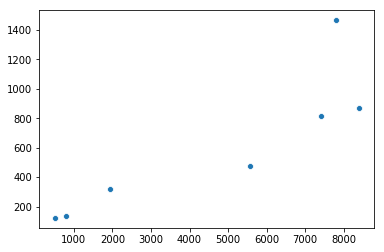

In [241]:
# What is the relationship between distance and cost?
sns.scatterplot(x=x, y=y);

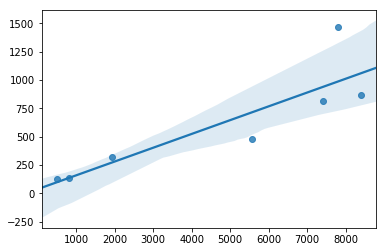

In [247]:
# Let's fit a line to that data

# There is a bug in Seaborn. Data cannot be in a tuple for regplot function.
x=list(x)
y=list(y)
sns.regplot(x=x, y=y);

<center><h2>How to estimate slope from points</h2></center>

$$slope = \frac{\sum_{i=1}^n (x_i- \bar x)(y_i- \bar y)}{\sum_{i=1}^n(x_i- \bar x)^2}$$

In [248]:
def slope(x, y):
    "Caculate the estimate the slope between x and y using least square method."
    x_mean = mean(x)
    y_mean = mean(y)
    numerator = sum((x[i]-x_mean)*(y[i]-y_mean) for i in range(len(x)))
    denominator = sum((x[i]-x_mean)**2 for i in range(len(x)))
    return  numerator/ denominator

In [249]:
observed_slope = slope(x, y)
print(f"{observed_slope:,.4f}")

0.1216


<center><h2>Student Activity:</h2></center>
<br>
<center>Using computational methods, test if the observed slope is statistically different from 0.</center>

Hints
-----

- What would the data look like if the slope is 0, aka null hypothesis?

- What is the simplest change you can make to the experimental code to model that?

```python
# Permutation testing for experimental data 

drug    = [54, 73, 53, 70, 73, 68, 52, 65, 65]
placebo = [54, 51, 58, 44, 55, 52, 42, 47, 58, 46]
observed_diff = mean(drug) - mean(placebo)

n = 10_000
count = 0

for _ in range(n):
    shuffle(combined)
    shuffled_diff = mean(combined[:len(drug)]) - mean(combined[len(drug):])
    count += (shuffled_diff >= observed_diff)

count/n
```

In [250]:
# Permutation testing for regression data
n = 10_000

count = 0
for _ in range(n):
    shuffle(y) # Permutate the data 
    random_slope = slope(x, y) # Caculate the statistic if null hypothesis is true
    count += (random_slope >= observed_slope) # Track how many times the random data is more like the alternative hypothesis than the observed data

In [251]:
print(f"""{n:,} label reshufflings produced only {count:,} instances 
with a difference at least as extreme as the observed difference of {observed_slope:.1f}.""")

10,000 label reshufflings produced only 26 instances 
with a difference at least as extreme as the observed difference of 0.1.


In [252]:
# Calculate the p-value
count / n

0.0026

<center><h2>What conclusion should we draw?</h2></center>

<center>There is a statistically significant linear relationship between flight distance and cost.</center>

In [256]:
# What happens with random data, not statistically signficant linear relationship?
from random import uniform

n = 10
x = [uniform(1, 100) for _ in range(10)]
y = [uniform(1, 100) for _ in range(10)]

# Permutation testing for regression data
n = 10_000

count = 0
for _ in range(n):
    shuffle(y) # Permutate the data 
    random_slope = slope(x, y) # Caculate the statistic if null hypothesis is true
    count += (random_slope >= observed_slope) # Track how many times the random data is more like the alternative hypothesis than the observed data

print(f"""{n:,} label reshufflings produced {count:,} instances 
with a difference at least as extreme as the observed difference of {observed_slope:.1f}.

""")

print(f"The p-value is {count / n}")

# Thus, fail to reject the null hypothesis

10,000 label reshufflings produced 3,434 instances 
with a difference at least as extreme as the observed difference of 0.1.


The p-value is 0.3434


<center><h2>The only question: "Is the apparent effect real, or is it due to chance?" 
</h2></center>

Thus, there is only a __single__ test in all of hypothesis testing!

If you use computational methods, you can throw away all your test statistics.

Computational methods also allow us to test hard / impossible hypotheses for analytical methods

<center><h2>Permutation tests for median differences</h2></center>

__Why do we care about median differences?__

- Data is often not normal. Median is robust to outliers and skew. 

- Median make sense for ordinal data. Whereas, the mean does not make sense for ordinal data.

Think of 1-bedroom rent in SF. What is the mean? What is the median?

__Why can't we use analytical methods for testing for median tests?__

It turns out deriving an exact sampling distribution is not possible for many cases of testing median.

<center><h2>Permutation tests for median differences</h2></center>

It is trivially simple to compare medians with permutation testing.

In [233]:
# Back to our drugs vs. placebo example

# Import median
from statistics import median

observed_diff = median(drug) - median(placebo)

n = 10_000
count = 0
for _ in range(n):
    shuffle(combined)
    new_diff = median(combined[:len(drug)]) - median(combined[len(drug):]) # Compare median differnce
    count += (new_diff >= observed_diff)
    
print(f"""{n:,} label reshufflings produced only {count} instances 
with a difference at least as extreme as the observed difference of {observed_diff:.1f}.

That gives a p-value of: {count / n}
""")

10,000 label reshufflings produced only 38 instances 
with a difference at least as extreme as the observed difference of 13.5.

That gives a p-value of: 0.0038



Median Test Resources
-----

- https://en.wikipedia.org/wiki/Median_test
- http://davidmlane.com/hyperstat/A106993.html
- http://rcompanion.org/handbook/F_15.html

Review
-------

- The goal of hypothesis testing is to systematically determine if there is an effect or not.
- We can simulate the null effect many times to create a sampling distribution.
- This can be done for many types of tests.
- Using Python's `random` module, including `shuffle`, it is straightforward to write simulation code.

Resources
-------

- "[Statistics Without the Agonizing Pain](https://www.youtube.com/watch?v=5Dnw46eC-0o)" by John Rauser
- "[Statistics is Easy](https://www.amazon.com/Statistics-Second-Synthesis-Lectures-Mathematics/dp/160845570X)" by Dennis Shasha and Manda Wilson
- [Raymond Hettinger's Modern Python course](https://github.com/rhettinger/modernpython/blob/master/resampling.py)
- https://stattrek.com/regression/regression-example.aspx
- http://allendowney.blogspot.com/2011/05/there-is-only-one-test.html


<center><img src="images/need_stats.jpg" width="75%"/></center>